In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

# Suprimir los warnings
warnings.filterwarnings("ignore", category=UserWarning)



In [4]:
# Cargar el conjunto de datos digits
digits = load_digits()
X, y = digits.data, digits.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [5]:
# Crear el modelo MLP con múltiples capas ocultas
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=100, random_state=42)

# Entrenar el modelo
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=100, random_state=42)

Precisión: 0.9667
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       0.97      0.97      0.97        33
           3       0.97      0.97      0.97        34
           4       1.00      1.00      1.00        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.93      0.87      0.90        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

Matriz de Confusión:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 32  1  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0 

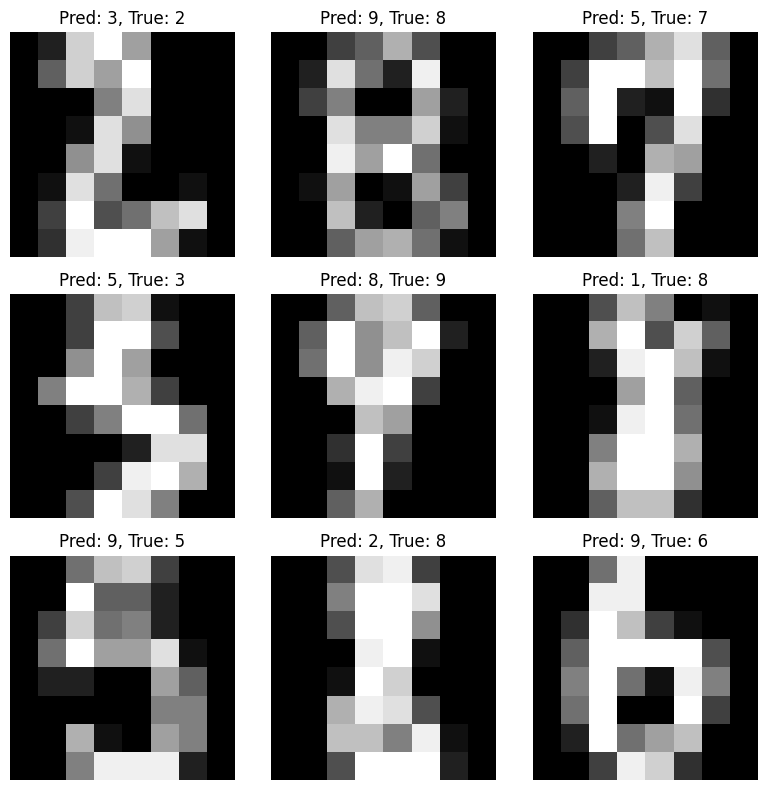

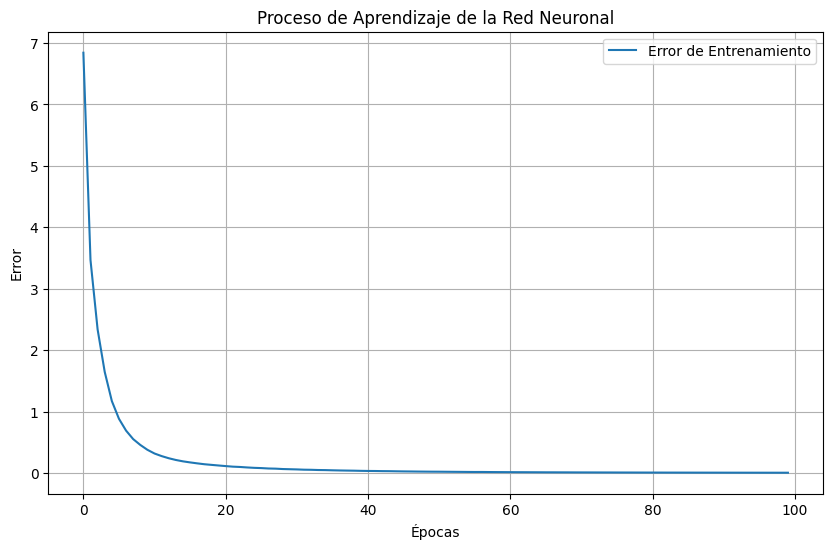

In [6]:
# Evaluar el modelo en el conjunto de prueba
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión: {accuracy:.4f}")

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Visualizar algunos ejemplos de predicciones incorrectas
incorrect = np.where(y_pred != y_test)[0]
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for ax, index in zip(axes.flatten(), incorrect[:9]):
    ax.imshow(X_test[index].reshape(8, 8), cmap='gray')
    ax.set_title(f"Pred: {y_pred[index]}, True: {y_test[index]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Gráfica del proceso de aprendizaje
errors = mlp.loss_curve_
plt.figure(figsize=(10, 6))
plt.plot(errors, label='Error de Entrenamiento')
plt.title("Proceso de Aprendizaje de la Red Neuronal")
plt.xlabel("Épocas")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
X_test.shape

(360, 64)

In [11]:
from PIL import Image

(1, 64) [[0. 6. 6. 6. 2. 0. 0. 0. 0. 0. 1. 2. 6. 1. 0. 0. 0. 0. 0. 1. 6. 2. 0. 0.
  0. 0. 2. 6. 7. 6. 1. 0. 0. 0. 0. 0. 0. 2. 6. 0. 0. 0. 0. 1. 3. 6. 5. 0.
  0. 1. 5. 5. 4. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 64) [[ 0.  1.  7. 14. 16. 12.  1.  0.  0.  7. 16.  9.  6. 11.  1.  0.  0. 11.
  12.  4.  1.  0.  0.  0.  0. 12. 16. 16. 15.  6.  0.  0.  0.  3.  9.  4.
  11. 12.  0.  0.  0.  0.  0.  0.  8. 16.  0.  0.  0.  0.  0.  0. 14. 13.
   0.  0.  0.  0.  6. 16. 15.  3.  0.  0.]]


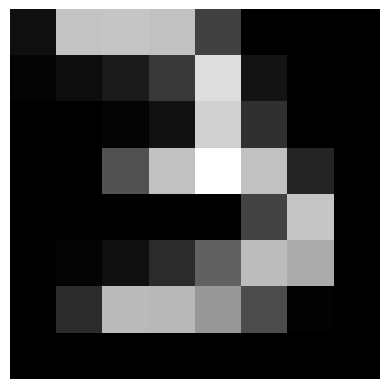

prediccion hecha [3]
Dígito Verdadero: 5, Dígito Predicho: 5


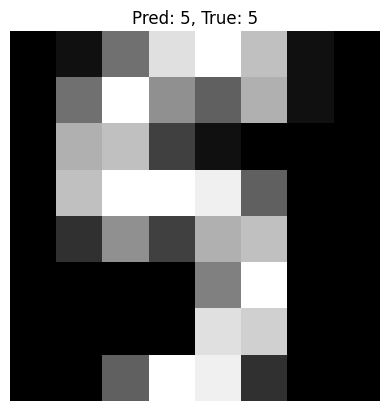

In [68]:
def classify_digit(model, digit_image):
    """
    Clasifica una imagen de un dígito utilizando el modelo entrenado.

    :param model: Modelo entrenado (MLPClassifier).
    :param digit_image: Imagen del dígito (array de 8x8 píxeles).
    :return: Predicción del dígito.
    """
    # Preprocesar la imagen (asegurarse de que tenga el tamaño correcto)
    image = Image.open("./digito.jpg").convert("L").resize((8, 8))

    arr_image = np.array(image)
    # print(arr_image)
    arr_image = 16 - (arr_image / 16)
    arr_image_figure = arr_image
    arr_image = arr_image.reshape(1, -1)
    arr_image = np.round(arr_image, 0)
    print(arr_image.shape, arr_image)
    # print(digit_image)
    digit_image = digit_image.reshape(1, -1)
    print(digit_image.shape, digit_image)
    # print(arr_image_figure.shape)
    plt.imshow(arr_image_figure, cmap='gray')
    # plt.title(f"Predicted: {predicted_digit}")
    plt.axis('off')
    plt.show()
    # Clasificar la imagen
    predictiontest= model.predict(arr_image)
    print( 'prediccion hecha' ,predictiontest)
    prediction = model.predict(digit_image)
    return prediction[0]

# Seleccionar un dígito aleatorio del conjunto de prueba
random_index = np.random.randint(0, X_test.shape[0])
random_digit_image = X_test[random_index]
true_label = y_test[random_index]

# Clasificar el dígito
predicted_label = classify_digit(mlp, random_digit_image)

# Mostrar el resultado
print(f"Dígito Verdadero: {true_label}, Dígito Predicho: {predicted_label}")

# Visualizar la imagen del dígito
plt.imshow(random_digit_image.reshape(8, 8), cmap='gray')
plt.title(f"Pred: {predicted_label}, True: {true_label}")
plt.axis('off')
plt.show()
